In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import glob
import plotly.io as pio
from astropy.io import fits
import pandas as pd
os.chdir('/Users/mmckay/phd_projects/analysis_routine/code/photometry_fns')
from isochrone_preprocessing_fns import *
from photmetry_catalog_preprocessing_fn import *
from plotting_fns import *

print(sns.__version__)
import matplotlib
print(matplotlib.__version__)
print(pd.__version__)

0.13.2
3.8.2
2.2.0


# PHAST

### - Make optical catalog - include F275W cols for UV band

In [2]:
phast_fits_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/4band-merged.fits'
output_file = '/Users/mmckay/phd_projects/analysis_routine/DATA/phast_f475W_f814W_table.csv'
phast_df = make_optical_photmetry_from_hst_dataproduct(photmetry_catalog_filepath=phast_fits_filepath, output_csv_filepath=output_file)

Adding F475W and F814W columns to table
Save catalog to CSV


### Forground extinction correction and GST selection 

In [3]:
# output_file = '/Users/mmckay/phd_projects/analysis_routine/DATA/phast_f475W_f814W_table.csv'
phast_df = phast_reduce_optical_photmetry_table(photometry_fits_filepath='/Users/mmckay/phd_projects/analysis_routine/DATA/phast_f475W_f814W_table.csv', 
                                            output_filepath='/Users/mmckay/phd_projects/analysis_routine/DATA/reduced_phast_table.csv')


/Users/mmckay/phd_projects/analysis_routine/code/photometry_fns/photmetry_catalog_preprocessing_fn.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catalog_df["f814w_vega_ecorr"] = catalog_df["f814w_vega"] + 0.596 * 0.17
/Users/mmckay/phd_projects/analysis_routine/code/photometry_fns/photmetry_catalog_preprocessing_fn.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catalog_df["f475w_vega_ecorr"] = catalog_df["f475w_vega"] + 1.212 * 0.17
/Users/mmckay/phd_projects/analysis_routine/code/photometry_

### -Interpolation

In [4]:
catalog_csv_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/reduced_phast_table.csv'
isochrone_csv_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/RGB_isochrone_tables/RGB_AGB_isochrone_table.csv'
output_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/interpolated_phast_rgb_agb_selection.csv'

interpolated_phast_rgb_agb = catalog_linear_interpolation(catalog_csv_filepath, 
                                                            isochrone_csv_filepath, 
                                                            output_filepath, 
                                                            savefile=True)

Running LinearNDInterpolator
Dropping fill values if any 79392
Saving the photometry catalog with interpolated values as /Users/mmckay/phd_projects/analysis_routine/DATA/interpolated_phast_rgb_agb_selection.csv


### -RGB selection

Saved RGB selection to /Users/mmckay/phd_projects/analysis_routine/DATA/test_modules/phast_rgb_selection.csv
Saved CMD to /Users/mmckay/phd_projects/analysis_routine/FIGURES/phast_cmd_plot.jpeg


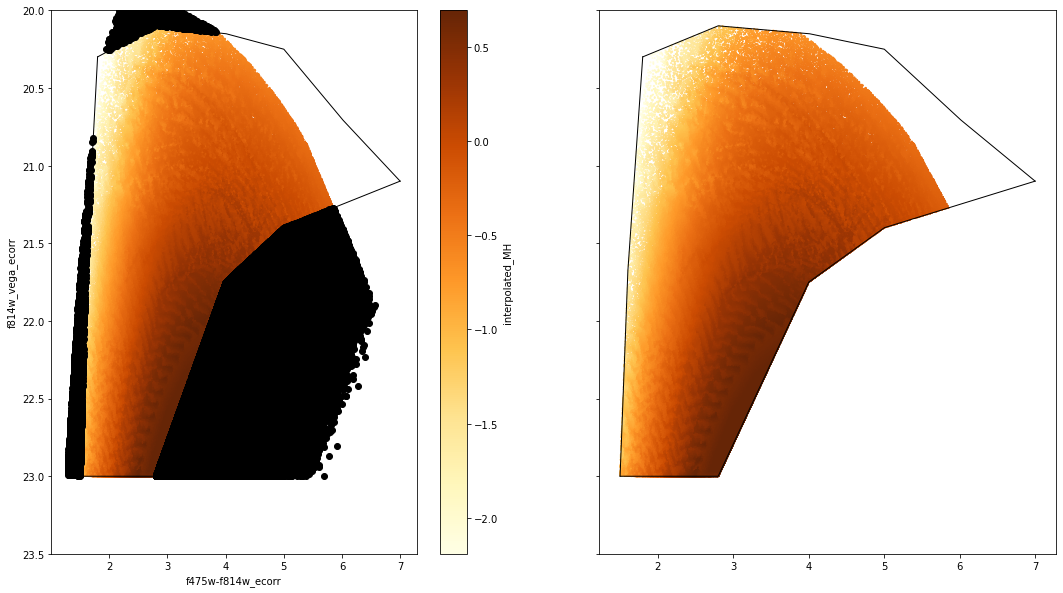

<Figure size 432x288 with 0 Axes>

In [5]:
csv_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/interpolated_phast_rgb_agb_selection.csv'
f814w_col = 'f814w_vega_ecorr'
f475w_f814_col = 'f475w-f814w_ecorr'
z_col = 'interpolated_MH'
savefile_path = '/Users/mmckay/phd_projects/analysis_routine/DATA/test_modules/phast_rgb_selection.csv'
savefig_filepath = '/Users/mmckay/phd_projects/analysis_routine/FIGURES/phast_cmd_plot.jpeg'

plot_CMD(csv_filepath, f814w_col, f475w_f814_col, z_col, savefile=True, apply_phat_rgb_MH_selection=True, save_rgb_selection=True, save_filepath=savefile_path, savefig_filepath=savefig_filepath)

### Plot CMD MDF stellar density and median M/H

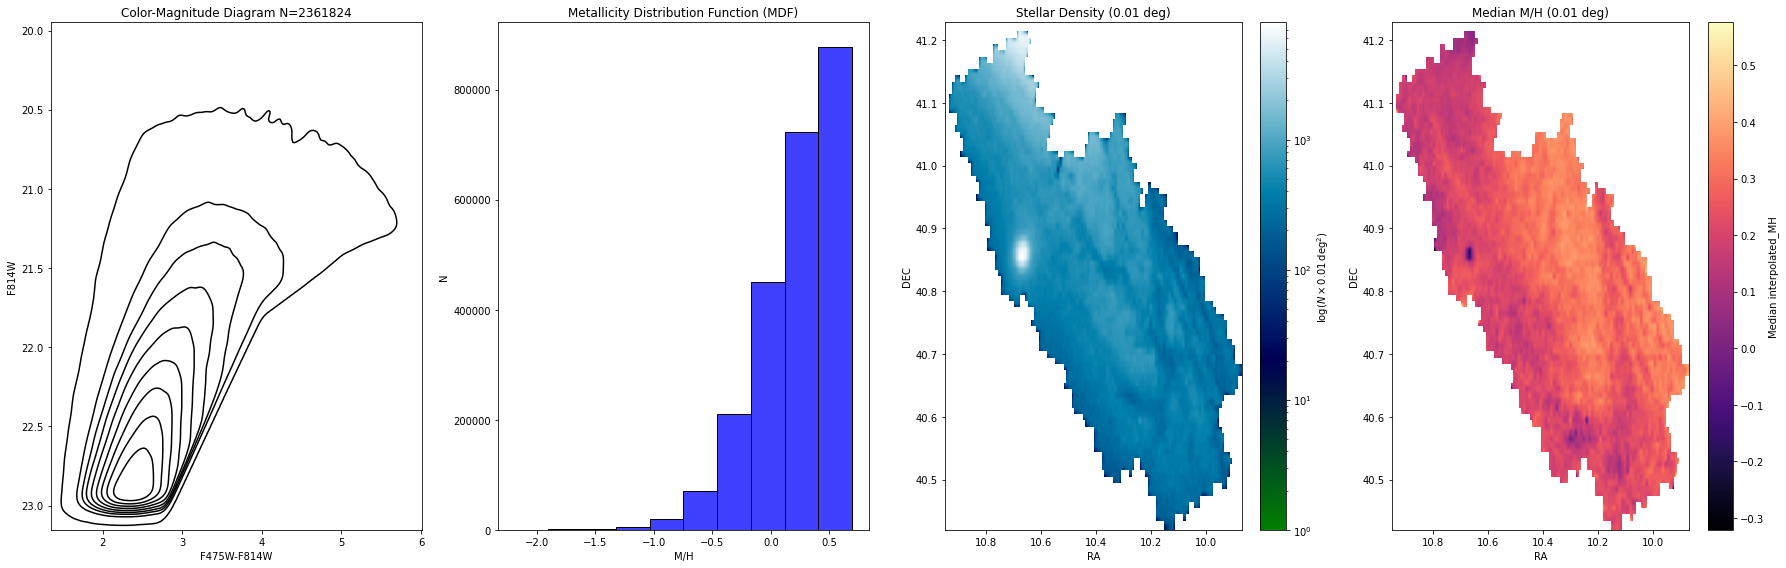

In [6]:
phast_rgb_gregersen_selection_df = pd.read_csv('/Users/mmckay/phd_projects/analysis_routine/DATA/test_modules/phast_rgb_selection.csv')
median_arr, stellar_density_arr = plot_cmd_mdf_spatial(phast_rgb_gregersen_selection_df, 
                     savefig_filepath='/Users/mmckay/phd_projects/analysis_routine/FIGURES/phast_cmd_mdf_spatial_gregersen_box.jpeg', 
                     bin_size_deg=0.01, z_col='interpolated_MH')

# PHAT

# PHATTER

In [ ]:
# phatter_hdu = fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/hlsp_phatter_hst_wfc3-uvis-acs-wfc-wfc3-ir_m33_f275w-f336w-f475w-f814w-f110w-f160w_v1_phot.fits')
# phatter_hdu.info()

In [ ]:
phatter_fits_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/hlsp_phatter_hst_wfc3-uvis-acs-wfc-wfc3-ir_m33_f275w-f336w-f475w-f814w-f110w-f160w_v1_phot.fits'
output_file = '/Users/mmckay/phd_projects/analysis_routine/DATA/phatter_f475W_f814W_table.csv'
phatter_df = make_optical_photmetry_from_hst_dataproduct(photmetry_catalog_filepath=phatter_fits_filepath, output_csv_filepath=output_file)

In [ ]:
output_file = '/Users/mmckay/phd_projects/analysis_routine/DATA/phatter_f475W_f814W_table.csv'
phatter_df = reduce_optical_photmetry_table(photometry_fits_filepath=output_file, 
                                            output_filepath='/Users/mmckay/phd_projects/analysis_routine/DATA/reduced_phatter_table.csv')


In [ ]:
catalog_csv_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/reduced_phatter_table.csv'
isochrone_csv_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/phatter_RGB_isochrone_tables/RGB_AGB_isochrone_table.csv'
output_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/interpolated_phatter_rgb_agb_selection.csv'

interpolated_phatter_rgb_agb = catalog_linear_interpolation(catalog_csv_filepath, 
                                                            isochrone_csv_filepath, 
                                                            output_filepath, 
                                                            savefile=True)